In [1]:
import glob
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import random


In [2]:
f_list = glob.glob('*_data_df.p')
df_list = []
for fname in f_list:
    if 'jupyter' not in fname:
        #if 'guard' in fname:
        df_list.append(pickle.load(open( fname, 'rb' )))
#print(df_list[5])
print(list(df_list[0]))

['label', 'word_count', 'sent_len', 'word_len', 'sent_len_std', 'unique_word_frac', 'cps', 'qps', 'exps', 'adverbs', 'verbs', 'adjectives', 'foreign', 'flesch', 'said_ps', 'and_ps', 'but_ps', 'flesch_five', 'flesch_sec', 'total_adv', 'total_verb', 'total_adj', 'sent_count', 'adv_ps', 'verb_ps', 'adj_ps', 'RB_ps', 'RBR_ps', 'RBS_ps', 'WRB_ps', 'VB_ps', 'VBD_ps', 'VBG_ps', 'VBN_ps', 'VBP_ps', 'VBZ_ps', 'JJ_ps', 'JJS_ps', 'JJR_ps', 'told_ps', 'i_ps', 'ngram_DT NN', 'ngram_NN NN', 'ngram_NN IN', 'ngram_IN DT', 'ngram_NN PP', 'ngram_JJ NN', 'ngram_IN NN', 'ngram_NN VB', 'ngram_PRP VB', 'ngram_VB IN', 'ngram_DT JJ', 'ngram_PP NN', 'ngram_PP PP', 'ngram_VB DT', 'ngram_CD NN', 'ngram_PP JJ', 'ngram_PP DT', 'ngram_PP VB', 'ngram_VB VB', 'ngram_PRP$ NN', 'ngram_TO VB', 'ngram_CD PP', 'ngram_NN CC', 'ngram_VB NN', 'ngram_PP PRP', 'ngram_VB JJ', 'ngram_MD VB', 'ngram_IN JJ', 'ngram_VB PP', 'ngram_PP IN', 'ngram_$ CD', 'ngram_PP CC', 'ngram_RB VB', 'ngram_VB RB', 'ngram_PP CD', 'ngram_JJ JJ', 'ngra

In [3]:
#print(df_list)
full_feature_df = pd.concat(df_list)
#print(full_feature_df)
print(len(list(full_feature_df)))

184


/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [ ]:
full_feature_df = full_feature_df.loc[full_feature_df['sent_count'] > 10]

In [ ]:
full_feature_df['sent_len_mean_over_std'] = full_feature_df['sent_len']/full_feature_df['sent_len_std']
full_feature_df = full_feature_df.loc[(full_feature_df['sent_len_std'] > 0) & (full_feature_df['sent_len'] > 0)]

In [ ]:
full_feature_df['flesch_dff'] = full_feature_df['flesch_five'] - full_feature_df['flesch']
#full_feature_df['fq1'] = full_feature_df['flesch_sec'].str[0]
#full_feature_df['fq2'] = full_feature_df['flesch_sec'].str[1]
#full_feature_df['fq3'] = full_feature_df['flesch_sec'].str[2]
#full_feature_df['fq4'] = full_feature_df['flesch_sec'].str[3]
full_feature_df['flesch_slope'] = full_feature_df['flesch_sec'].apply(lambda row: sum([row[ci+1] - row[ci] for ci in range(3)])/4)
print(full_feature_df['flesch_slope'])

In [28]:
feat_list = ['word_count', 'sent_len', 'word_len', 'sent_len_std', 'unique_word_frac',                                                                     
                'cps', 'qps', 'exps', 'foreign', 'flesch',                                                                                                     
                'RB_ps', 'RBR_ps', 'RBS_ps', 'WRB_ps', 'VB_ps',                                                                                                
                'VBD_ps', 'VBG_ps', 'VBN_ps', 'VBP_ps', 'VBZ_ps', 'JJ_ps', 'JJS_ps', 'JJR_ps',                                                                 
                'said_ps', 'and_ps', 'but_ps', 'told_ps', 'i_ps', 'pronoun_ps', 'determiner_ps', 
                'preposition_ps', 'word_rarity']
             
#['word_count', 'sent_len', 'word_len', 'sent_len_std', 'unique_word_frac', 
#'cps', 'qps', 'exps', 'foreign', 'flesch',  'flesch_five',
#'RB_ps', 'RBR_ps', 'RBS_ps', 'WRB_ps', 'VB_ps', 
#'VBD_ps', 'VBG_ps', 'VBN_ps', 'VBP_ps', 'VBZ_ps', 'JJ_ps', 'JJS_ps', 'JJR_ps',
#'said_ps', 'and_ps', 'but_ps', 'told_ps', 'i_ps', 'pronoun_ps', 'determiner_ps', 'preposition_ps', 'word_rarity']

class_names = [i.loc[0,'label'] for i in df_list]
print(class_names)
mean_values = []
for ci,label_id in enumerate(class_names):
    mean_values.append(df_list[ci][feat_list].mean().tolist())
pickle.dump(mean_values, open('mean_features.p', 'wb'))


['nyt', 'atl', 'fox', 'natrev', 'breit', 'wapo', 'buzz', 'vox', 'guard']


/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated,

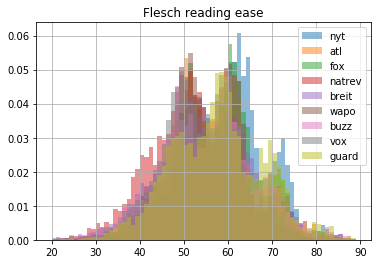

In [60]:
for feature in feat_list:
    plt.title('Flesch reading ease')
for ci,label_id in enumerate(class_names):
    df_list[ci].loc[(df_list[ci]['word_count'] < 6000) & (df_list[ci]['sent_len'] < 70)]['flesch'].hist(bins = range(20,90,1), alpha = 0.5, normed = True)
plt.legend(class_names)

In [ ]:
def compare_article(text_features):
    full_feature_df[[feat_list]].mean()
    #pub_list = [nyt, breit, wapo]
    wc_mean = [np.mean(i.word_count) for i in pub_list]
    print(wc_mean)
    #wc_mean1 = [np.mean(nyt_wc), np.mean(breit_wc), np.mean(wapo_wc)]
    #print(wc_mean, wc_mean1)
    sent_len_mean = [np.mean(i.sent_len) for i in pub_list]#, np.mean(breit_sent_len), np.mean(wapo_sent_len)]
    sent_len_std_mean = [np.mean(i.sent_len_std) for i in pub_list]#, np.mean(breit_sent_len_std), np.mean(wapo_sent_len_std)]
    unique_word_frac_mean = [np.mean(i.unique_word_frac) for i in pub_list]#, np.mean(breit_unique_word_frac), np.mean(wapo_unique_word_frac)]
    word_len_mean = [np.mean(i.word_len) for i in pub_list]#, np.mean(breit_word_len), np.mean(wapo_word_len)]
    cps_mean = [np.mean(i.cps) for i in pub_list]#, np.mean(breit_cps), np.mean(wapo_cps)]
    features = ['sentence length', 'sentence length distribution', 'unique word fraction', 'word length', 'commas per sentence']
    mean_features = [[i, j, k, l, m] for i, j, k, l, m in zip(sent_len_mean, sent_len_std_mean, unique_word_frac_mean, word_len_mean, cps_mean)]
    print(mean_features)
    pickle.dump(mean_features, open('mean_features.p', 'wb'))
    return [[float(i/j) for i,j in zip(text_features, pub_features)] for pub_features in mean_features]

In [ ]:
print(full_feature_df[['ngram_DT NN', 'ngram_NN NN', 'ngram_NN IN', 'ngram_IN DT', 'ngram_NN PP', 'ngram_JJ NN', 'ngram_IN NN', 'ngram_NN VB', 'ngram_PRP VB', 'ngram_VB IN', 'ngram_DT JJ', 'ngram_PP NN', 'ngram_PP PP', 'ngram_VB DT', 'ngram_CD NN', 'ngram_PP JJ', 'ngram_PP DT', 'ngram_PP VB', 'ngram_VB VB', 'ngram_PRP$ NN', 'ngram_TO VB', 'ngram_CD PP', 'ngram_NN CC', 'ngram_VB NN', 'ngram_PP PRP']])

In [5]:
#full_feature_df = pd.concat(df_list)
#full_feature_df = full_feature_df.fillna(0)
#for i in feat_list:
#    if 'ngram_' in i:
#        full_feature_df[i] = full_feature_df[i]/full_feature_df['word_count']


import matplotlib.ticker as ticker
#corr = full_feature_df[feat_list].corr()

#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#plt.figure(figsize=(10,10))
# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr,cmap=cmap, center=0,
#            square=True, linewidths=.3, cbar_kws={"shrink": .8})




full_feature_df[feat_list].head()

min_word_count = 0

feature_array = full_feature_df.loc[(full_feature_df['word_count'] > min_word_count)][feat_list].values
label_array =   full_feature_df.loc[(full_feature_df['word_count'] > min_word_count)]['label'].values
#print(full_feature_df[feat_list][(full_feature_df >= 0).all(1)].head())

article_counts = full_feature_df.groupby('label')['label'].count().tolist()
class_names = [i.loc[0,'label'] for i in df_list]

In [6]:
#combine features
#X = [[i, j, k, l, m, n, o] for i, j, k, l, m, n, o in zip(
#    sent_len_std, unique_word_frac, word_len, cps, qps, exps, flesch)]#, sup_adv_ps, verb_ps, sent_compound)]
#feature_names = ['sentence variability', 'unique word fraction', 
#                 'mean word length', 'commas per sentence', 'questions per sentence', 
#                 'exclamations per sentence', 'flesch']#, 'adverbs per sentence', 
                 #'verbs per sentence', 'sent_compound']



X = feature_array
feature_names = feat_list
#print(label_array)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_names)

print(list(le.classes_))

#print(le.transform(["tokyo", "tokyo", "paris"]))

#print(list(le.inverse_transform([2, 2, 1])))



Y = le.transform(label_array)#[np.where(label_array, i)[0] for i in label_array]

n_samples = len(X)

data_boundaries = article_counts
#data_boundaries = [n_articles for i in [nyt, breit, wapo, guard]]
print(data_boundaries)
print(class_names)
cumulative_bounds = [0]
for ci, i in enumerate(data_boundaries):
    cumulative_bounds.append(i+cumulative_bounds[ci])
print(cumulative_bounds)
#cumulative_bounds = [0]
#cumulative_bounds = [cumulative_bounds[i-1] + i for i in data_boundaries]
print(len(X))
#X = np.asarray(wc).reshape(-1,1)

#labels
#Y = [0 for i in range(len(nyt_feature_df.word_count))] + \
#    [1 for i in range(len(breit_feature_df.word_count))] + \
#    [2 for i in range(len(wapo_feature_df.word_count))] + \
#    [3 for i in range(len(guard_feature_df.word_count))]
#Y = [0 for i in range(n_articles)] + [1 for i in range(n_articles)] + [2 for i in range(n_articles)] + [3 for i in range(n_articles)]
print(len(Y))


['atl', 'breit', 'buzz', 'fox', 'guard', 'natrev', 'nyt', 'vox', 'wapo']
[4989, 4919, 4835, 4348, 4884, 4943, 4976, 4947, 4956]
['nyt', 'atl', 'fox', 'natrev', 'breit', 'wapo', 'buzz', 'vox', 'guard']
[0, 4989, 9908, 14743, 19091, 23975, 28918, 33894, 38841, 43797]
43797
43797


In [7]:
#test train split
from sklearn.model_selection import train_test_split

indices = np.arange(n_samples)

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, Y, indices, test_size=0.4)
print(idx_train)
print(idx_test)
print(X_train.max())
#text_list = nyt_sent + breit_sent + wapo_sent +guard_sent
#print(len(text_list))

[42203 10609  7397 ... 19386 29461 42732]
[ 7607 14117 40673 ... 10440 31050 28553]
34435.89678510998


In [ ]:
#pca

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

In [ ]:
#rf with pca

X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=30)
for i in range(100,4500, 400):
    rand_start = random.randint(0,4500 - i)
    rf_clf = rf_clf.fit(X_t_train[rand_start:rand_start + i], y_train[rand_start:rand_start + i])

    print(rf_clf.score(X_t_test, y_test))
rf_clf = rf_clf.fit(X_t_train, y_train)
print(rf_clf.score(X_t_test, y_test))

y_pred = rf_clf.predict(X_t_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]

In [ ]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':range(3,20)}
#clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
#clf.fit(X=X_train, y=y_train)
#tree_model = clf.best_estimator_
#print (clf.best_score_, clf.best_params_) 


#clf = tree.DecisionTreeClassifier(max_depth = 5)
#clf = clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

rf_clf = RandomForestClassifier(n_estimators=50)
#for i in range(100,4500, 400):
#    rand_start = random.randint(0,4500 - i)
#    rf_clf = rf_clf.fit(X_train[rand_start:rand_start + i], y_train[rand_start:rand_start + i])

#    print(rf_clf.score(X_test, y_test))
rf_clf = rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_test, y_test))

y_pred = rf_clf.predict(X_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]
y_score = xg_clf.fit(X_train, y_train).decision_function(X_test)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

xg_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25,
                                 max_depth=5, random_state=0).fit(X_train, y_train)
print(xg_clf.score(X_test, y_test))

y_pred = xg_clf.predict(X_test)

#y_score = xg_clf.fit(X_train, y_train).decision_function(X_test)

0.48638620925851933


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


xg_clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.25,
                                 max_depth=5, random_state=0)).fit(X_train, y_train)
print(xg_clf.score(X_test, y_test))

y_pred = xg_clf.predict(X_test)

y_score = xg_clf.fit(X_train, y_train).decision_function(X_test)

0.494149209429762


In [10]:
from sklearn.externals import joblib
joblib.dump(xg_clf, 'xg_clf_6_21.pkl') 

['xg_clf_6_21.pkl']

9
17519
17519


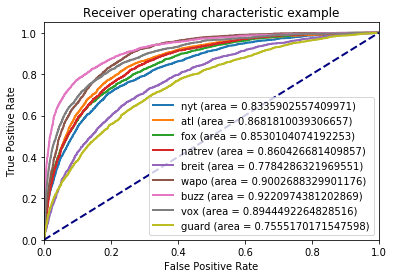

In [11]:
# Compute ROC curve and ROC area for each class

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
fpr = dict()
tpr = dict()
roc_auc = dict()
print(len(class_names))
print(len(y_test))
print(len(y_score))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve( (y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
for i in range(9):
    plt.plot(fpr[i], tpr[i], 
             lw=lw, label='{} (area = {})'.format(str(class_names[i]), str(roc_auc[i])))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#fill in df with predicted and true labels
test_df = full_feature_df.iloc[idx_test]
test_df['true'] = y_test
test_df['pred'] = y_pred
print(y_test)

#print(len(idx_test))
#test_df = full_feature_df.lookup(*zip(*array_indices))
#print(test_df[['true','pred']])
true_pred = test_df.loc[test_df['true'] == test_df['pred']]
false_pred = test_df.loc[test_df['true'] != test_df['pred']]
pd.set_option('display.max_columns', None)
print(len(true_pred), len(false_pred))
print((true_pred.describe() - false_pred.describe()))

Normalized confusion matrix
[[0.45 0.04 0.04 0.04 0.06 0.14 0.06 0.09 0.07]
 [0.03 0.53 0.09 0.09 0.07 0.07 0.02 0.05 0.05]
 [0.05 0.11 0.47 0.1  0.08 0.02 0.06 0.05 0.07]
 [0.02 0.14 0.09 0.47 0.09 0.05 0.04 0.02 0.08]
 [0.09 0.07 0.09 0.09 0.33 0.09 0.08 0.06 0.09]
 [0.08 0.04 0.01 0.02 0.05 0.62 0.02 0.1  0.06]
 [0.07 0.03 0.04 0.03 0.07 0.02 0.67 0.03 0.05]
 [0.08 0.06 0.04 0.02 0.04 0.11 0.01 0.59 0.05]
 [0.07 0.08 0.06 0.08 0.07 0.12 0.11 0.1  0.31]]


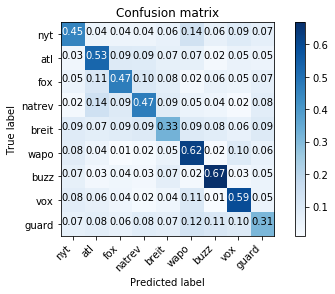

In [12]:
from sklearn.metrics import confusion_matrix
import itertools
#New York Times', 'Breitbart', 'Washington Post', 'Guardian']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha = 'right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix', normalize = True)


Feature ranking:
1. feature 0 (0.067138)
2. feature 4 (0.061047)
3. feature 23 (0.049122)
4. feature 2 (0.044835)
5. feature 5 (0.044489)
6. feature 31 (0.044062)
7. feature 3 (0.043362)
8. feature 9 (0.040794)
9. feature 15 (0.037214)
10. feature 1 (0.036261)
11. feature 28 (0.032269)
12. feature 10 (0.032045)
13. feature 19 (0.031625)
14. feature 20 (0.030817)
15. feature 14 (0.030282)
16. feature 30 (0.030251)
17. feature 29 (0.029461)
18. feature 17 (0.028493)
19. feature 18 (0.027444)
20. feature 16 (0.027050)
21. feature 25 (0.026143)
22. feature 24 (0.025702)
23. feature 27 (0.023726)
24. feature 22 (0.022383)
25. feature 13 (0.020627)
26. feature 11 (0.020393)
27. feature 6 (0.020335)
28. feature 26 (0.020250)
29. feature 21 (0.018412)
30. feature 12 (0.013706)
31. feature 7 (0.010712)
32. feature 8 (0.009552)
[ 0  4 23  2  5 31  3  9 15  1 28 10 19 20 14 30 29 17 18 16 25 24 27 22
 13 11  6 26 21 12  7  8]


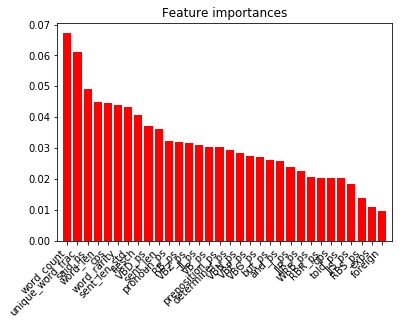

In [30]:
importances = xg_clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in xg_clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[0])):#.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(X[0])), importances[indices],
       color="r", align='center')#, yerr=std[indices], align="center")
#plt.bar(range(40), importances[indices[:40]],
#       color="r", align='center')#, yerr=std[indices], align="center")

print(indices)
plt.xticks(range(len(X[0])), [feature_names[i] for i in indices], rotation = 45, ha = 'right')
plt.xlim([-1, len(X[0])])
#plt.xticks(range(40), [feature_names[i] for i in indices[:40]], rotation = 45, ha = 'right')
#plt.xlim([-1, 40])

plt.show()

In [ ]:
conf_mat = np.zeros((4,4))
count = 0
for pred, true in zip(y_pred, y_test):
    if pred == 0 and true == 3:
            print(pred, true, count, 'mismatch')
            print(' '.join(text_list[idx_test[count]]))
            input()
    conf_mat[pred,true] += 1.
    count += 1
print(count)
#conf_mat[2,1] += 1000
#[y,x] format (first index (predicted) is on the vertical, second index (truth) is on the horizontal)
plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))
print(Counter(y_test))